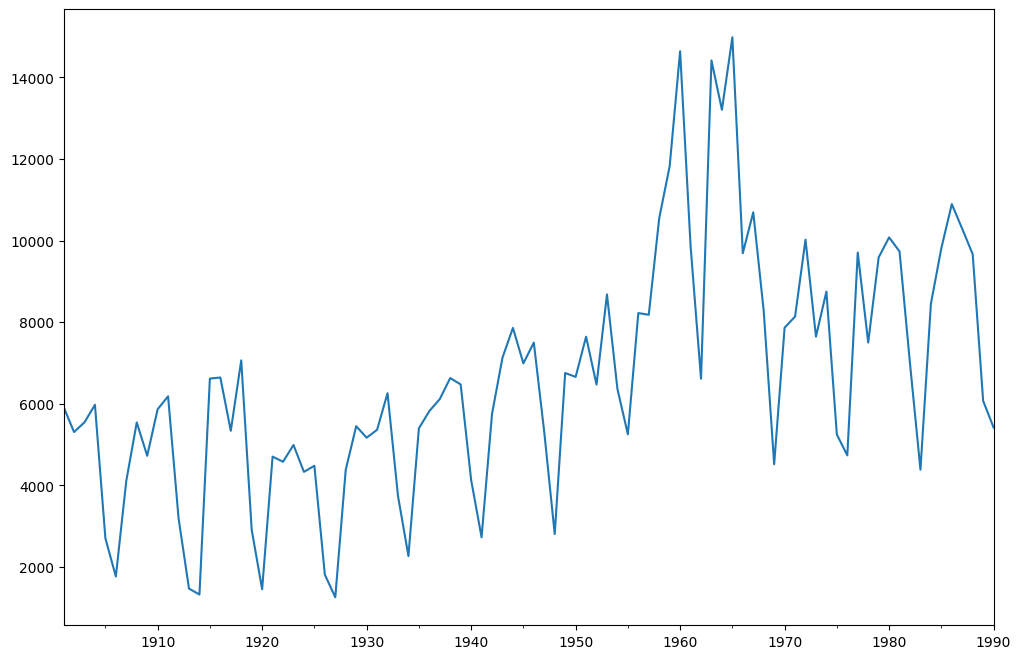

/Users/du/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/du/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency inf

AIC: 1619.6323


/Users/du/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


AttributeError: 'Series' object has no attribute 'ix'

In [5]:
# ARMA demo
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.graphics.api import qqplot

# create data
data = [5922, 5308, 5546, 5975, 2704, 1767, 4111, 5542, 4726, 5866, 6183, 3199, 1471, 1325, 6618, 6644, 5337, 7064, 2912, 1456, 4705, 4579, 4990, 4331, 4481, 1813, 1258, 4383, 5451, 5169, 5362, 6259, 3743, 2268, 5397, 5821, 6115, 6631, 6474, 4134, 2728, 5753, 7130, 7860, 6991, 7499, 5301, 2808, 6755, 6658, 7644, 6472, 8680, 6366, 5252, 8223, 8181, 10548, 11823, 14640, 9873, 6613, 14415, 13204, 14982, 9690, 10693, 8276, 4519, 7865, 8137, 10022, 7646, 8749, 5246, 4736, 9705, 7501, 9587, 10078, 9732, 6986, 4385, 8451, 9815, 10894, 10287, 9666, 6072, 5418]
data = Series(data)
data_index = sm.tsa.datetools.dates_from_range('1901', '1990')

# draw the image
data.index = pd.Index(data_index)
data.plot(figsize=(12,8))
plt.show()

# create ARMA model
arma = ARMA(data, (7,0)).fit()
print('AIC: %.4lf' % arma.aic)

# Model prediction
predict_y = arma.predict('1990', '2000')

# draw prediction
fig, ax = plt.subplots(figsize=(12,8))
ax = data.ix['1901':].plot(ax = ax)
predict_y.plot(ax = ax)
plt.show()
